In [1]:
# This file is associated with the book
# "Machine Learning Refined", Cambridge University Press, 2016.
# by Jeremy Watt, Reza Borhani, and Aggelos Katsaggelos.

import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from __future__ import division
import pylab
from sklearn.model_selection import KFold
from sklearn.cross_validation import train_test_split

C:\Users\dhana\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# load data
def load_data():
    data = np.array(np.genfromtxt('wavy_data.csv', delimiter=','))
    x = np.reshape(data[:,0],(np.size(data[:,0]),1))
    y = np.reshape(data[:,1],(np.size(data[:,1]),1))
    return x,y

x,y=load_data()



    

In [3]:
def build_fourier(X,D):   
    F= np.ones((2*D+1,np.size(X)))  
    for i in range(1,D+1):    
        F[2*i-1,:]=(np.cos(2*np.pi*i*X)).T
        F[2*i,:]=(np.sin(2*np.pi*i*X)).T
    

    return F


# plot the polynomial  
def plot_model(w,D):
    # plot determined surface in 3d space
    s = np.arange(0,1,.01)
    f = build_fourier(s,D)
    z = np.dot(f.T,w)

    # plot contour in original space
    plt.plot(s,z, color = 'r', linewidth = 2)
    plt.ylim([-1.5,1.5])
    plt.xlim([0,1])


In [4]:
# plot mse's over all D tested 
def plot_mse(mses,mses1,deg):
    plt.plot(np.arange(1,np.size(mses)+1),mses,'ro--')
    #plt.plot(mses,'ro--',color="black")
    plt.plot(np.arange(1,np.size(mses1)+1),mses1,'.-')
    #plt.plot(mses1,'.-')
    plt.title('MSE on entire dataset in D', fontsize=18)
    plt.xlabel('degree D', fontsize=18)
    plt.ylabel('MSE       ', fontsize=18)

# plot data 
def plot_data(x,y,deg):
    for i in np.arange(1,9):
        plt.subplot(2,4,i)
        plt.scatter(x,y,s = 30, color = 'k')

        # graph info labels
        s = 'D = ' + str(deg[i-1])
        plt.title(s, fontsize=15)
        plt.axis('off')

In [5]:
# run over all the degrees, fit each models, and calculate errors
def try_all_degs(deg_range):
    # plot datapoints - one panel for each deg in deg_range
    fig = plt.figure(figsize = (8,4))
    plot_data(x,y,deg_range)

    # generate nonlinear features
    mses = []
    mses1=[]
    X_train ,X_test,Y_train,Y_test = train_test_split(x,y,train_size=0.67) 
    #print(X_train.shape)
    #print(X_test.shape)
    for D in np.arange(0,len(deg_range)):
        # generate poly feature transformation
        F = build_fourier(X_train,deg_range[D])
        
        F1 = build_fourier(X_test,deg_range[D])   
        
        
        # get weights for current model
        
        temp = np.linalg.pinv(np.dot(F,F.T))
        w = np.dot(np.dot(temp,F),Y_train)
        
        MSE = np.linalg.norm(np.dot(F.T,w)-Y_train)/(np.size(Y_train))
        mses.append(MSE)
        
         
        
        temp1 = np.linalg.pinv(np.dot(F1,F1.T))
        #w = np.dot(np.dot(temp,F1),Y_test)
        MSE1 = np.linalg.norm(np.dot(F1.T,w)-Y_test)/(np.size(Y_test))
        mses1.append(MSE1)
    # plot fit to data
        plt.subplot(2,4,D+1)
        
        plot_model(w,deg_range[D])
        
    #print("train:",mses)
    #print("test:",mses1)
    # make plot of mse's
    fig = plt.figure(figsize = (5,5))
    plot_mse(mses,mses1,deg_range)
    plt.show()

C:\Users\dhana\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


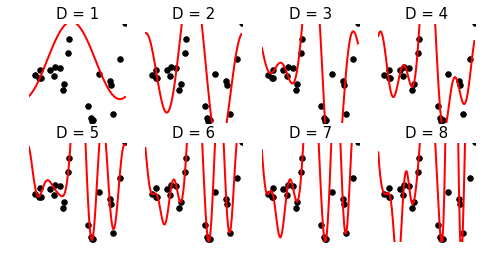

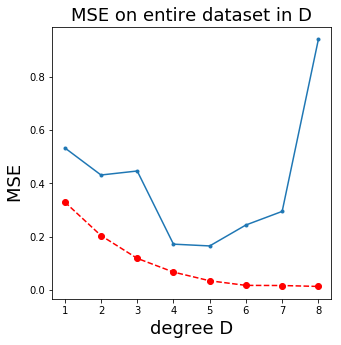

In [11]:
deg_range = [1,2,3,4,5,6,7,8]           # degree polys to try


# run all over degree range
try_all_degs(deg_range)